In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition

In [2]:
final_hidden_vals_filename = '../data/sarkisyan_final_hidden_vals_64_evotuned_weights.txt'
brightness_filename = '../data/sarkisyan_filtered_brightness.txt'
seqs_filename = '../data/sarkisyan_filtered_seqs.txt'
final_hidden_vals = np.loadtxt(final_hidden_vals_filename)
brightness = np.loadtxt(brightness_filename)
seqs = np.loadtxt(seqs_filename)

In [3]:
final_hidden_vals.shape, brightness.shape, seqs.shape

((51715, 64), (51715,), (51715, 238))

In [4]:
pca = decomposition.PCA(n_components=6)
pca.fit(final_hidden_vals)
pcs = pca.transform(final_hidden_vals)

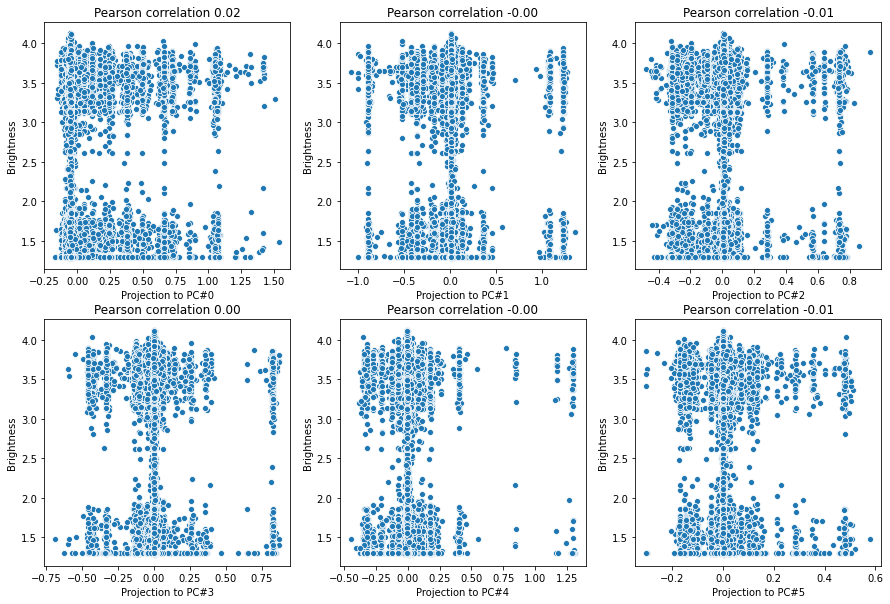

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i in range(pcs.shape[1]):
    ax = axes.flatten()[i]
    sns.scatterplot(pcs[:, i], brightness, ax=ax)
    ax.set_xlabel('Projection to PC#%d' % i)
    ax.set_ylabel('Brightness')
    ax.set_title('Pearson correlation %.2f' % np.corrcoef(pcs[:, i], brightness)[0][1])
plt.show()

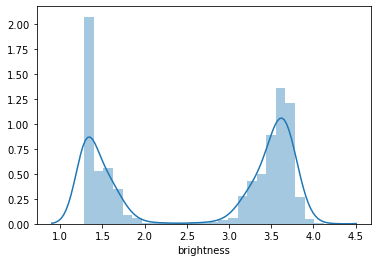

In [6]:
sns.distplot(brightness)
plt.xlabel('brightness')
plt.show()